In [61]:
import numpy as np
import methods
import oracles
import plot_trajectory_2d
import matplotlib.pyplot as plt

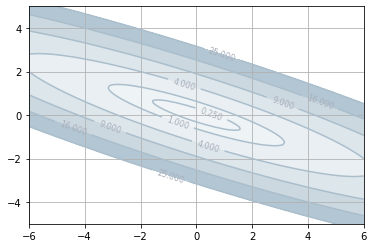

In [3]:
oracle = oracles.QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
plot_trajectory_2d.plot_levels(oracle.func)

101


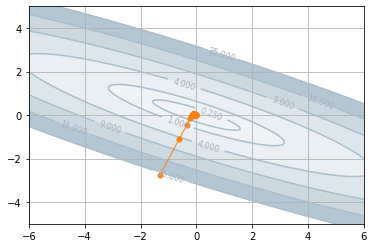

In [4]:
oracle = oracles.QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Constant", "c": 0.1})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist['x'])
print(len(m.hist["x"]))

101


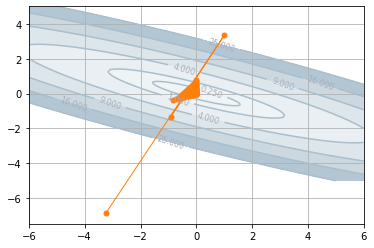

In [5]:
oracle = oracles.QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Armijo"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist['x'])
print(len(m.hist["x"]))

78


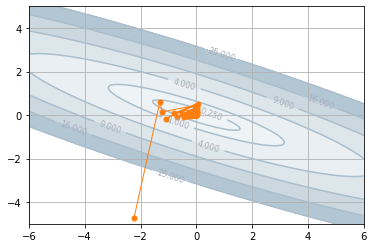

In [6]:
oracle = oracles.QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Wolfe"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist['x'])
print(len(m.hist["x"]))

In [12]:
k = 10

In [13]:
S = lambda phi: np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])

In [14]:
S_2 = S(2)

In [15]:
A = np.diag([1, k])
A

array([[ 1,  0],
       [ 0, 10]])

In [16]:
mat = S_2.dot(A).dot(S_2.T)

101


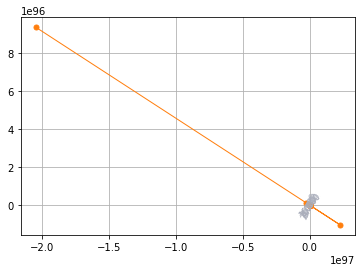

In [17]:
oracle = oracles.QuadraticOracle(mat, np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Constant"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print(len(m.hist["x"]))

39


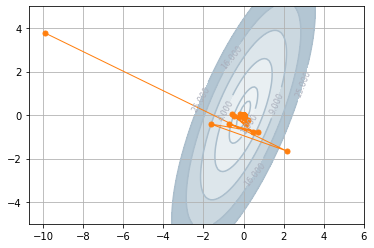

In [18]:
oracle = oracles.QuadraticOracle(mat, np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Armijo"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print(len(m.hist["x"]))

4


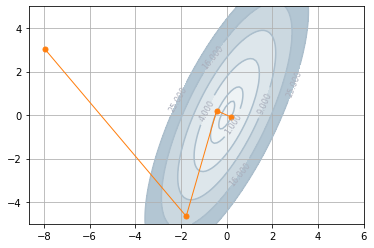

In [19]:
oracle = oracles.QuadraticOracle(mat, np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Wolfe"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print(len(m.hist["x"]))

In [20]:
k = 100

In [21]:
A = np.diag([1, k])
mat = S_2.dot(A).dot(S_2.T)

101


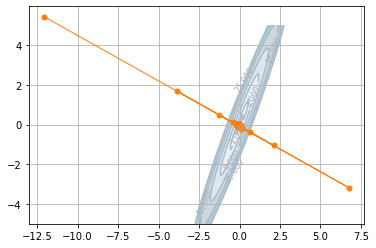

In [22]:
oracle = oracles.QuadraticOracle(mat, np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Armijo"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print(len(m.hist["x"]))

In [16]:
m.hist["x_star"]

array([0.23659515, 0.55526713])

101


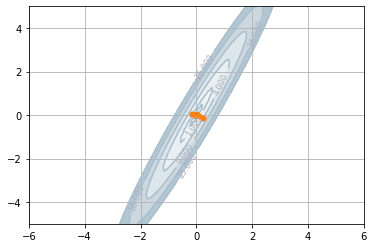

In [17]:
oracle = oracles.QuadraticOracle(mat, np.zeros(2))
m = methods.GradientDescent(oracle, np.array([.03, .5]), line_search_options={"method": "Armijo"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print(len(m.hist["x"]))

3


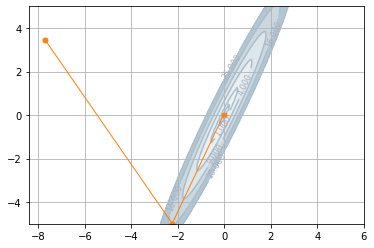

In [18]:
oracle = oracles.QuadraticOracle(mat, np.zeros(2))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Wolfe"})
m.run()
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print(len(m.hist["x"]))

## 2.3 - один метод 

In [29]:
def rand_A(n, k):
    diag = [1]
    for i in range(n - 2):
        diag.append(np.random.random() * (k - 1) + 1)
    diag.append(k)
    return np.diag(diag)

In [30]:
A = rand_A(3, 10)
A

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  3.37194461,  0.        ],
       [ 0.        ,  0.        , 10.        ]])

In [31]:
oracle = oracles.QuadraticOracle(A, np.zeros(3))
m = methods.GradientDescent(oracle, np.array([10.0, 1.5, 3.0]), line_search_options={"method": "Wolfe"})
m.run()
#plot_trajectory_2d.plot_levels(oracle.func)
#plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print(len(m.hist["func"]))

38


In [109]:
def N_k(n, k_left=10, k_right=31, step=2, samples=100):
    """we sample random function 'samples' times and get average iterations"""
    iters = []
    for k in range(k_left, k_right, step):
        iter_sum = 0
        for j in range(samples):
            A = rand_A(n, k)
            oracle = oracles.QuadraticOracle(A, np.random.random(n))
            m = methods.GradientDescent(oracle, np.random.random(n), line_search_options={"method": "Wolfe"})
            m.run()
            iter_sum += len(m.hist["func"])
        iters.append([k, int(iter_sum / samples)])
    
    '''x = iters[0, :]
    y = iters[]
    plt(x, i)'''
    #print(iters[0, :])
    iters = np.array(iters)
    x = iters[:, 0]
    y = iters[:, 1]
    plt.plot(x, y)
    return iters

array([[10,  9],
       [12, 13],
       [14,  7],
       [16,  6],
       [18, 10],
       [20,  6],
       [22, 12],
       [24, 14],
       [26, 10],
       [28, 13],
       [30,  9]])

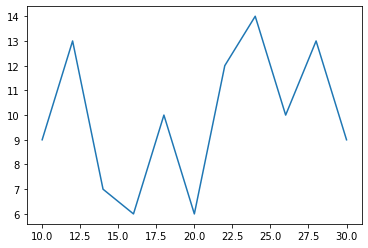

In [116]:
N_k(2)

array([[10, 32],
       [12, 40],
       [14, 44],
       [16, 48],
       [18, 52],
       [20, 52],
       [22, 59],
       [24, 64],
       [26, 71],
       [28, 69],
       [30, 70]])

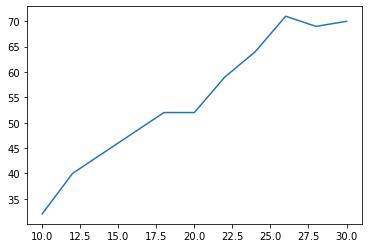

In [115]:
N_k(3)

array([[10, 39],
       [12, 46],
       [14, 51],
       [16, 52],
       [18, 52],
       [20, 61],
       [22, 65],
       [24, 74],
       [26, 72],
       [28, 81],
       [30, 80]])

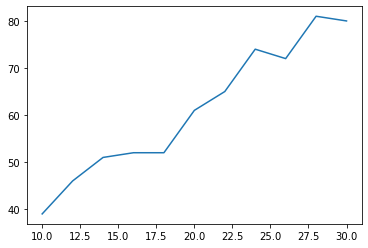

In [111]:
N_k(4)

array([[10, 40],
       [12, 47],
       [14, 54],
       [16, 55],
       [18, 57],
       [20, 61],
       [22, 63],
       [24, 72],
       [26, 79],
       [28, 80],
       [30, 79]])

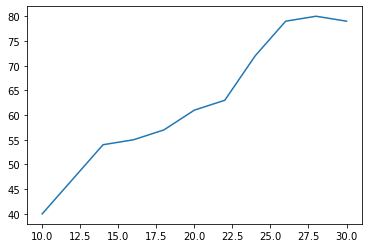

In [112]:
N_k(5)

array([[10, 41],
       [12, 46],
       [14, 53],
       [16, 58],
       [18, 58],
       [20, 60],
       [22, 69],
       [24, 74],
       [26, 78],
       [28, 79],
       [30, 83]])

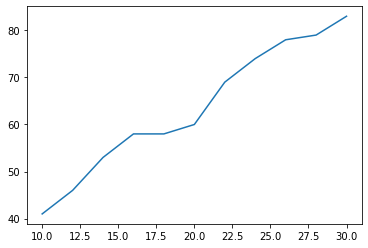

In [113]:
N_k(6)

array([[10, 41],
       [12, 47],
       [14, 54],
       [16, 56],
       [18, 58],
       [20, 61],
       [22, 66],
       [24, 69],
       [26, 75],
       [28, 82],
       [30, 85]])

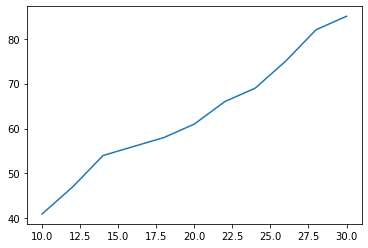

In [118]:
N_k(7)

## 2.4

In [120]:
from sklearn.datasets import load_svmlight_file

In [121]:
a = load_svmlight_file("a9a.txt", n_features = 123) #, zero_based = True

In [122]:
len(a)

2

In [123]:
len(a[1])

32561

In [124]:
a[1][:15]

array([-1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1.])

In [125]:
a[1]

array([-1., -1., -1., ..., -1., -1.,  1.])

In [126]:
a[0].todense()

matrix([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
a[0]

<32561x123 sparse matrix of type '<class 'numpy.float64'>'
	with 451592 stored elements in Compressed Sparse Row format>

In [128]:
oracle = oracles.create_log_reg_oracle(a[0], a[1], 0.5)
m = methods.GradientDescent(oracle, np.zeros(123), line_search_options={"method": "Armijo"})
m.run()
print(len(m.hist["func"]))

59


In [61]:
oracle = oracles.create_log_reg_oracle(a[0], a[1], 0.5)
m = methods.GradientDescent(oracle, np.zeros(123), line_search_options={"method": "Constant"})
m.run()
print(len(m.hist["func"]))

59


In [62]:
oracle = oracles.create_log_reg_oracle(a[0], a[1], 0.5)
m = methods.GradientDescent(oracle, np.zeros(123), line_search_options={"method": "Wolfe"})
m.run()
print(len(m.hist["func"]))

59


In [144]:
def datasets(file_path, n_features, run_iters=100):
    a = load_svmlight_file(file_path, n_features = n_features)
    oracle = oracles.create_log_reg_oracle(a[0], a[1], 0.5)
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Armijo"})
    m.run(run_iters)
    print("Armijo method iters = {}".format(len(m.hist["func"])))
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Constant"})
    m.run(run_iters)
    print("Constant method iters = {}".format(len(m.hist["func"])))
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Wolfe"})
    m.run(run_iters)
    print("Wolfe method iters = {}".format(len(m.hist["func"])))

In [143]:
datasets("./datasets/a9a.txt", n_features = 123)

Armijo method iters = 59
Constant method iters = 59
Wolfe method iters = 59


In [ ]:
datasets("./datasets/gisette_scale.bz2", 5000)